# Импорт библиотек 

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from seaborn import boxplot
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Чтение, анализ и обработка данных

In [ ]:
df=pd.read_csv('train_1.csv')
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Пропусков в данных нет

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Можно объединить две фичи - 3g и 4g

In [ ]:
df['g'] = df.three_g + df.four_g # полученные значения: 2 - 4g, 1 - 3g, 0 - ничего
df.drop(['three_g', 'four_g'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Посмотрим на корреляцию и создадим топ признаков, влияющих на цену


In [ ]:
price_corr = df.corr().price_range
sorted_corr=sorted(dict(price_corr).items(), key=lambda x: abs(x[1]), reverse=True)
feature_corr_top=[i[0] for i in sorted_corr]
print(feature_corr_top, len(feature_corr_top))

['price_range', 'ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'touch_screen', 'mobile_wt', 'sc_h', 'fc', 'talk_time', 'g', 'blue', 'wifi', 'dual_sim', 'clock_speed', 'n_cores', 'm_dep'] 20


На цену телефона больше всего влияют озу, мощность батареи и габариты телефона


Можно попробовать создать новый признак - площадь телефона, тк исходя из топа 
стоимость телефона сильно зависит от его размеров 


In [ ]:
df['square']=df.px_width*df.px_height

Повторим создание топа с новой переменной

In [ ]:
price_corr = df.corr().price_range
sorted_corr=sorted(dict(price_corr).items(), key=lambda x: abs(x[1]), reverse=True)
feature_corr_top=[i[0] for i in sorted_corr]
print(feature_corr_top, len(feature_corr_top))

['price_range', 'ram', 'battery_power', 'square', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'touch_screen', 'mobile_wt', 'sc_h', 'fc', 'talk_time', 'g', 'blue', 'wifi', 'dual_sim', 'clock_speed', 'n_cores', 'm_dep'] 21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


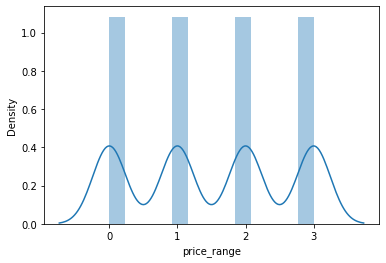

In [ ]:
sns.distplot(df['price_range'])

Количество телефонов разных ценовых категорий примерно одинаково

Подготовим данные для модели

In [ ]:
X=df.drop(feature_corr_top[10::], axis=1) # удалим фичи с низких мест топа корреляции для уменьшения переобучения дерева 
X=X.drop(['price_range'], 1)
y=df.price_range 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Обучение деревьев

In [ ]:
rf_clf=RandomForestClassifier()
parametrs={'criterion': ['entropy'],
             'max_depth': [16, 18, 20],
             'min_samples_split': [3, 4, 5],
             'min_samples_leaf': [1, 3, 5]}
search = GridSearchCV(rf_clf, parametrs, cv=5)
search.fit(X_train, y_train)
best_tree=search.best_estimator_
search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

Тут я смотрела на лучшие параметры и меняла допустимые диапазоны значений гиперпараметров в коде

# Предсказания и анализ

In [ ]:
predictions=best_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, predictions)
conf_matrix

array([[123,   9,   0,   0],
       [  7, 108,   3,   0],
       [  0,  11,  98,  11],
       [  0,   0,   6, 124]])

Модель путает только близкие категории цен. Больше всего она ошибается в пресказаниях телефонов 2 ценовой категории, предсказывая 1 и 3 категории.

In [ ]:
print("f1_score = ", f1_score(y_test, predictions, average='macro'), "\naccuracy_score = ", accuracy_score(y_test, predictions))

f1_score =  0.9040663145373798 
accuracy_score =  0.906


Допзадание:

Переобученность - признак модели, которая не была достаточно ограничена в обучении и поэтому выучила излишние закономерности в данных. Модель пытается идеально подстроить себя под все данные из треина, поэтому на тестовых данных она ведет себя плохо. Особенно плохо это при выбросах в данных, тк модель запоминает эти закономерности и может выдать неправильный результат в предсказаниях. 
Это похоже на клишированное заучивание под формат егэ, тк человек натаскивается на определенные задания именно из егэ, а когда ему дают нетипичное задание, он не может его решить. А если человеку лишь объяснять схему решения задач, он сам научится правильно решать и егэшные задачи и задачи похожего типа (в нашем случае это тестовые данные для модели). 